In [150]:
"""
data/
├── Test/
│   ├── Ascaris_lumbericoides/
│   │   ├── Ascaris lumbericoides_0001.jpg
|   |   |── Ascaris lumbericoides_0002.jpg
│   │   ├── ....
│   ├── Capillaria_philippinensis
│   │   ├── Capillaria philippinensis_0001.jpg
|   |   ├── Capillaria philippinensis_0002.jpg
|   |   ├── ...
│   └── ...
├── Train/
│   ├── Ascaris_lumbericoides/
│   │   ├── Ascaris lumbericoides_0001.jpg
|   |   |── Ascaris lumbericoides_0002.jpg
│   │   ├── ....
│   ├── Capillaria_philippinensis
│   │   ├── Capillaria philippinensis_0001.jpg
|   |   ├── Capillaria philippinensis_0002.jpg
|   |   ├── ...
│   └── ...
└── Validate/
    ├── Ascaris_lumbericoides/
    │   ├── Ascaris lumbericoides_0001.jpg
    |   |── Ascaris lumbericoides_0002.jpg
    │   ├── ....
    ├── Capillaria_philippinensis
    │   ├── Capillaria philippinensis_0001.jpg
    |   ├── Capillaria philippinensis_0002.jpg
    |   ├── ...
    └── ...
    └── ...
"""

'\ndata/\n├── Test/\n│   ├── Ascaris_lumbericoides/\n│   │   ├── Ascaris lumbericoides_0001.jpg\n|   |   |── Ascaris lumbericoides_0002.jpg\n│   │   ├── ....\n│   ├── Capillaria_philippinensis\n│   │   ├── Capillaria philippinensis_0001.jpg\n|   |   ├── Capillaria philippinensis_0002.jpg\n|   |   ├── ...\n│   └── ...\n├── Train/\n│   ├── Ascaris_lumbericoides/\n│   │   ├── Ascaris lumbericoides_0001.jpg\n|   |   |── Ascaris lumbericoides_0002.jpg\n│   │   ├── ....\n│   ├── Capillaria_philippinensis\n│   │   ├── Capillaria philippinensis_0001.jpg\n|   |   ├── Capillaria philippinensis_0002.jpg\n|   |   ├── ...\n│   └── ...\n└── Validate/\n    ├── Ascaris_lumbericoides/\n    │   ├── Ascaris lumbericoides_0001.jpg\n    |   |── Ascaris lumbericoides_0002.jpg\n    │   ├── ....\n    ├── Capillaria_philippinensis\n    │   ├── Capillaria philippinensis_0001.jpg\n    |   ├── Capillaria philippinensis_0002.jpg\n    |   ├── ...\n    └── ...\n    └── ...\n'

In [151]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

## Dataset Preparation  
- load the dataset
- resize to (244 x 244) pixels
- convert to grayscale
- return the number of images present in the testing, training and validation set and how many categories in each of them (shape of the dataset)

In [152]:
dataset = {
        'train': {'images': [], 'labels': []},
        'test': {'images': [], 'labels': []},
        'validate': {'images': [], 'labels': []},
    }

def load_dataset(data_dir, image_size=(224, 224)):
    
    """
    Load images and labels from a dataset directory with 'Train', 'Test', and 'Validate' subfolders.
    Labels are the categories of the images.
    
    Parameters:
    - data_dir: Path to the main dataset directory
    - image_size: Tuple indicating the desired size to resize images (default is (224, 224))
    
    Returns:
    - A dictionary containing the loaded images and labels for 'train', 'test', and 'validate' sets, along with the shapes of the images and label counts
    
    """

    for folder in ['Train', 'Test', 'Validate']: # loop through the Train, Test and Validate folder
        set_path = os.path.join(data_dir, folder)
        
        for category in os.listdir(set_path): # loop through each subfolders in the Train, Test, and Validate folder
            category_path = os.path.join(set_path, category)
            
            if os.path.isdir(category_path): # ensure the current path is a directory
                # Loop through each image file in the category
                for img_file in os.listdir(category_path):
                    img_path = os.path.join(category_path, img_file)
                    img = cv2.imread(img_path) # read each image using openCV and convert to grayscale
    
                    # python returns a ValueError because images are of varying dimmensions;causes np.array() to fail when trying to convert list of images into a np.array()
                    img = cv2.resize(img, image_size) # thus, images are resized to dimmensions of 244 x 244
                    
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) # convert to RGB ↔ YCrCb JPEG according to - https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html
                    # 1. applying different compression levels to the luminance and chrominance components, we achieve significant file size reduction
                    # 2. since varying color contrast, brightness etc are in play - color correction or noise reduction benefit from working in the YCbCr color space
                    
                    # denoising following fastNlMeansDenoising() - https://docs.opencv.org/3.4/d1/d79/group__photo__denoise.html#ga4c6b0031f56ea3f98f768881279ffe93
                    img = cv2.fastNlMeansDenoising(img, 
                                                   None, # OutputArray = None
                                                   10, # filter strenght parameter is set to 20 based on various runs adjusting
                                                   7, # size of the template window set to recomneded value of 7 pixels
                                                   21 # search window size set to 21 pixels to reduce denoising time because of the datasize
                                                ) 
                    
                    img = cv2.normalize(img, 0, 255, norm_type=cv2.NORM_MINMAX) # normalize the data
                    
                
                    dataset[folder.lower()]['images'].append(img) # append the names of the subfolder as labels for each image
                    dataset[folder.lower()]['labels'].append(category)  # Use folder name as label

    # convert lists to np.arrays()
    dataset['train']['images'] = np.array(dataset['train']['images'])
    dataset['test']['images'] = np.array(dataset['test']['images'])
    dataset['validate']['images'] = np.array(dataset['validate']['images'])

    return dataset

data_dir = '/Users/rakshithbn/Desktop/MLD-Advanced/data'
dataset = load_dataset(data_dir)
dataset

{'train': {'images': array([[[[235,  86,  66],
           [235,  86,  66],
           [235,  86,  66],
           ...,
           [233,  85,  66],
           [232,  85,  66],
           [232,  85,  66]],
  
          [[235,  86,  66],
           [235,  86,  66],
           [235,  86,  66],
           ...,
           [235,  85,  66],
           [233,  85,  66],
           [232,  85,  66]],
  
          [[235,  86,  66],
           [235,  86,  66],
           [235,  86,  66],
           ...,
           [236,  85,  66],
           [232,  85,  66],
           [229,  85,  66]],
  
          ...,
  
          [[ 84,  85,  72],
           [ 86,  85,  72],
           [ 92,  85,  72],
           ...,
           [248,  85,  66],
           [248,  85,  66],
           [248,  85,  66]],
  
          [[ 94,  85,  72],
           [ 97,  85,  72],
           [104,  85,  71],
           ...,
           [248,  85,  66],
           [248,  85,  66],
           [248,  85,  66]],
  
          [[ 99,  85,  

## Define base function to plot the gallery of the eggs
- returns plot (Gray color indicates negative values, white indicates positive values)

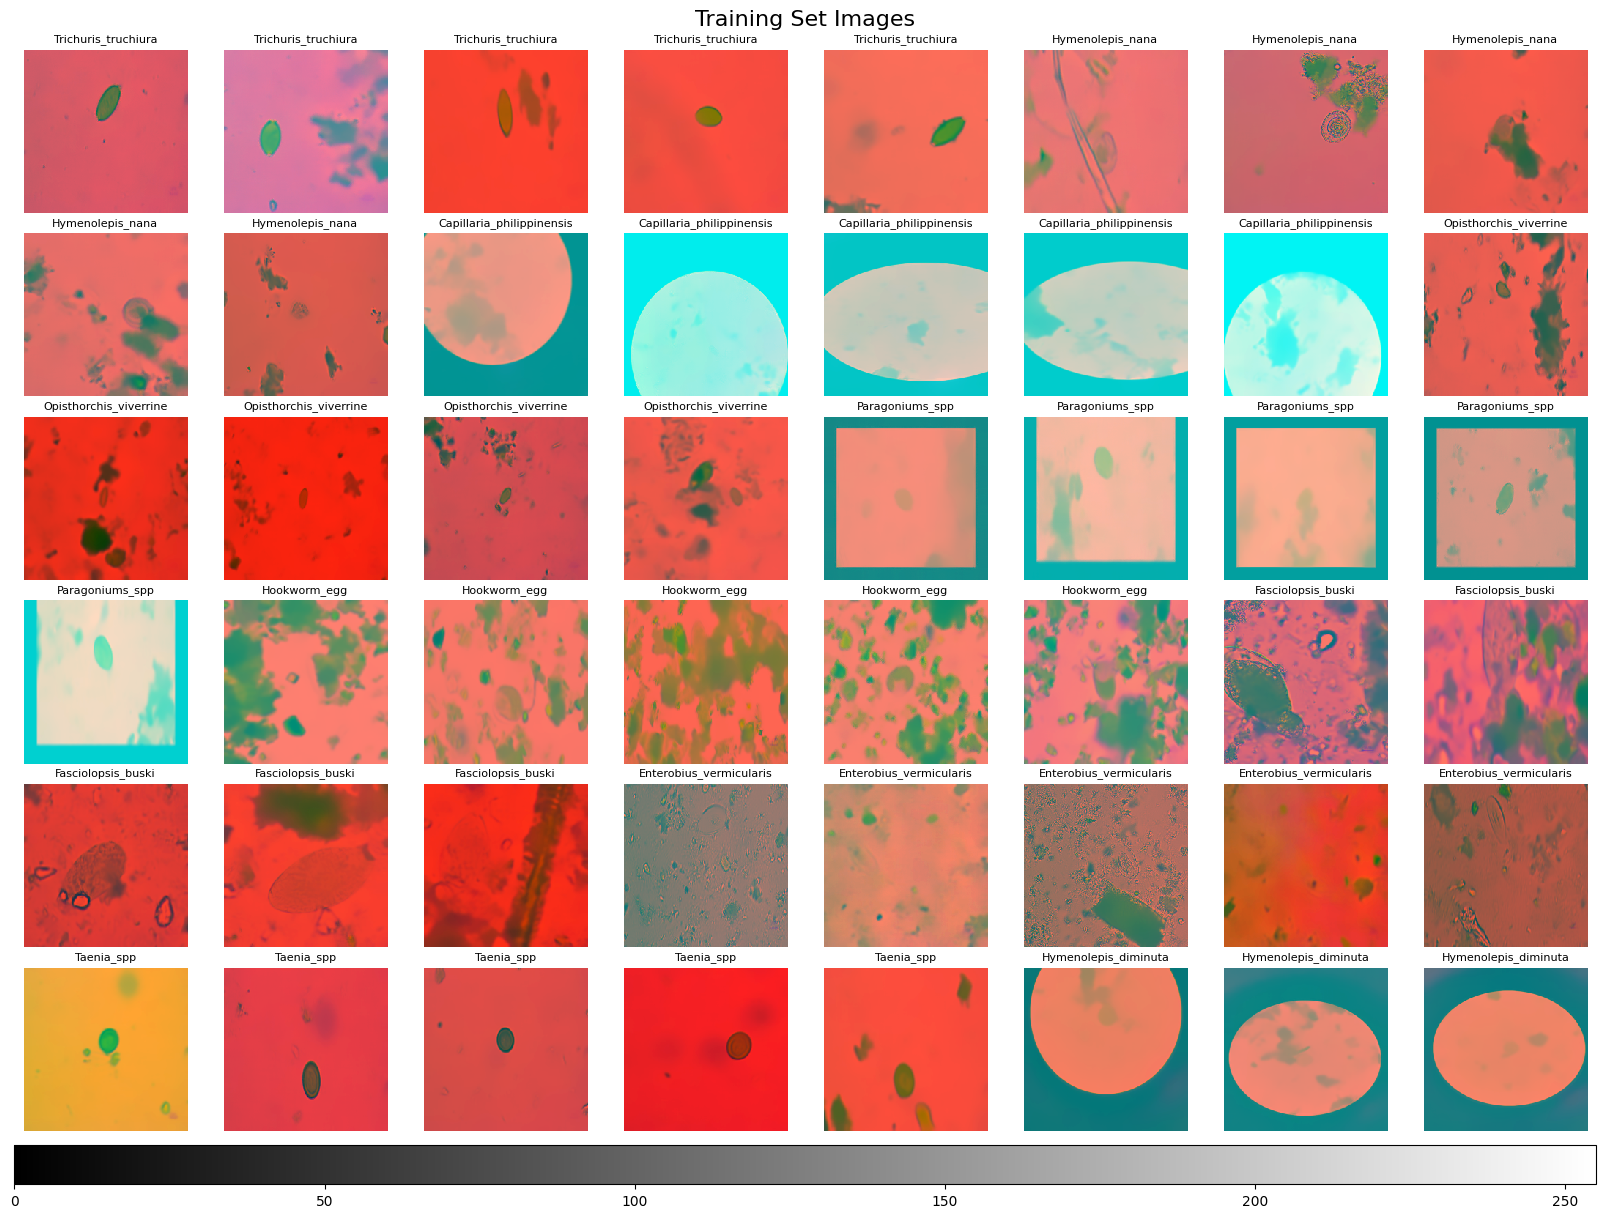

In [153]:
n_row, n_col = 6, 8 
n_components = n_row * n_col
image_shape = (64, 64)  # reshape to plot

def plot_gallery(title, images, labels, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2 * n_row),
        facecolor="white",
        constrained_layout=True
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.suptitle(title, size=16)
    
    axs = np.ravel(axs) # Flatten the array of axes for easy iteration
    
    for ax, img, label in zip(axs, images, labels):
        im = ax.imshow(img, cmap=cmap, interpolation="nearest")
        ax.set_title(label, fontsize=8)
        ax.axis("off")

    #fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01) # colorbar for reference
    plt.show()
    
display_image_by_category = defaultdict(list)
for img, label in zip(dataset['test']['images'], dataset['test']['labels']):
    if len(display_image_by_category[label]) < 5:
        display_image_by_category[label].append((img, label))
            
display_image = []
display_labels = []
for label, image in display_image_by_category.items():
    for img, lbl in image:
        display_image.append(img)
        display_labels.append(lbl)

plot_gallery("Training Set Images", display_image[:n_components], display_labels[:n_components], n_col=n_col, n_row=n_row)

### Edge Detection + Find Circles in images using the Hough Transform